## In-class practice for Lecture 14

* Statistics basics: Distributions of data sets using histograms
* New Python tricks: seaborn and scipy.stats
* Answer each question using Python codes in a separate cell

### 1.  Histograms for distributions

Download the datafile named "gradedata.xlsx" from Moodle

- load the excel file as a Pandas data frame, take a look at the data frame (know exactly what column data you have!)
- use the describe() function to get the mean and standard deviation of the grade data. What's the median value?
- Can you use the describe() function to find out the grade that is 80% of the maximum? (figure it out yourself)
- use **matplotlib** to generate a histogram of all the grades
- separate the histogram of the grades into two, filtering by: "male" and "female", plot the two histograms in the same plot 
- are there any gender differences evident in the grade data?
- Test the whether grade distributions are Normal or not using the **normaltest()** function from **scipy.stats**
- now, cut the dataset into four subgroups by hours of work (0-25%, 25-50%, 50-75%, 75-100%), and make four histograms to show your results. Is it better to squeeze all the groups in one plot or separate them? 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

file = '../Datasets/gradedata.xlsx'
df = pd.read_excel(file)
print(df.head()) # take a look at the data frame - get a sense of what column data you're working with
df.describe()

     fname     lname  gender  age  exercise  hours  grade  \
0   Marcia      Pugh  female   17         3     10   82.4   
1   Kadeem  Morrison    male   18         4      4   78.2   
2     Nash    Powell    male   18         5      9   79.3   
3  Noelani    Wagner  female   14         2      7   83.2   
4  Noelani    Cherry  female   18         4     15   87.4   

                                      address  
0        7379 Highland Rd. , Dublin, GA 31021  
1          8 Bayport St. , Honolulu, HI 96815  
2           Encino, CA 91316, 3 Lilac Street   
3  Riverview, FL 33569, 9998 North Smith Dr.   
4   97 SE. Ocean Street , Bethlehem, PA 18015  


,age,exercise,hours,grade
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,16.578500,3.000500,10.988500,82.556050
std,1.696254,1.423205,4.063942,9.747593
min,14.000000,0.000000,0.000000,32.000000
25%,15.000000,2.000000,8.000000,75.575000
50%,17.000000,3.000000,11.000000,82.700000
75%,18.000000,4.000000,14.000000,89.700000
max,19.000000,5.000000,20.000000,100.000000


so the min grade is 32, and the max is 100. the median value is the one right at 50%, which is 82.7

In [8]:
# use the describe() method to the 80% 
df.describe(percentiles = [.25, .5, .8])

,age,exercise,hours,grade
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,16.578500,3.000500,10.988500,82.556050
std,1.696254,1.423205,4.063942,9.747593
min,14.000000,0.000000,0.000000,32.000000
25%,15.000000,2.000000,8.000000,75.575000
50%,17.000000,3.000000,11.000000,82.700000
80%,18.000000,4.000000,15.000000,91.300000
max,19.000000,5.000000,20.000000,100.000000


now we know the 80% cut is 91.3

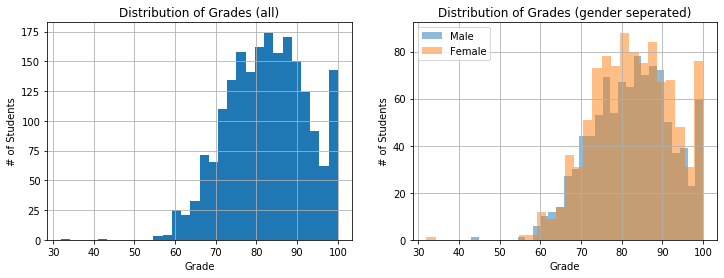

In [37]:
# histogram for all gender
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df.grade.hist(bins=30)
plt.xlabel('Grade')
plt.ylabel('# of Students')
plt.title('Distribution of Grades (all)')

# plot seperate histograms for male and female students
plt.subplot(1,2,2)
df.grade[df.gender=='male'].hist(bins=30,alpha=0.5,label='Male')
df.grade[df.gender=='female'].hist(bins=30,alpha=0.5,label='Female')
plt.legend()
plt.xlabel('Grade')
plt.ylabel('# of Students')
plt.title('Distribution of Grades (gender seperated)')
plt.show()

the distributio of the grades does not look like gender-dependent

In [24]:
# now test weather the grade follows a normal distribution
from scipy import stats

k2, p = stats.normaltest(df.grade.dropna())

print('For distributon of the grade (all), the p value is ', p)

if p > 0.05:
    print('Grade looks Gaussian')
else:
    print('Grade does not look Gaussian')

For distributon of the grade (all), the p value is  9.06973324721894e-05
Grade does not look Gaussian


     fname     lname  gender  age  exercise  hours  grade  \
0   Marcia      Pugh  female   17         3     10   82.4   
1   Kadeem  Morrison    male   18         4      4   78.2   
2     Nash    Powell    male   18         5      9   79.3   
3  Noelani    Wagner  female   14         2      7   83.2   
4  Noelani    Cherry  female   18         4     15   87.4   

                                      address  Efficiency  
0        7379 Highland Rd. , Dublin, GA 31021  8-11 hours  
1          8 Bayport St. , Honolulu, HI 96815   0-8 hours  
2           Encino, CA 91316, 3 Lilac Street   8-11 hours  
3  Riverview, FL 33569, 9998 North Smith Dr.    0-8 hours  
4   97 SE. Ocean Street , Bethlehem, PA 18015   >14 hours  


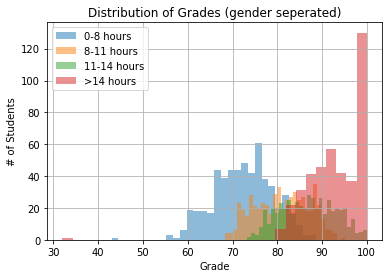

In [39]:
# based on the describe() function we know that the hour of work distrbution looks like:
# 0  - 25%: <=8 hours
# 25 - 50%: 8-11 hours
# 50 - 75%: 11-14 hours
# 75 - 100%: >14 hours

# you can cut it manually but i'd love to try the cut() function
bins = [0, 8, 11, 14, 20] # define 4 groups (bins) based on the hour of work
group_names = ['0-8 hours','8-11 hours','11-14 hours','>14 hours'] # define group names

df['Efficiency']=pd.cut(df['hours'],bins,labels=group_names) # bin the data, create a new column
print(df.head())

# now lets generate histograms
for group in group_names:
    df.grade[df.Efficiency==group].hist(bins = 30, alpha = 0.5, label = group)
    
plt.legend()
plt.xlabel('Grade')
plt.ylabel('# of Students')
plt.title('Distribution of Grades (gender seperated)')
plt.show()

so, the more hours you spent on your study, the better grade you get!

### 2.  Histograms using the seaborn module

Download the datafile named "gdp_data.txt" from Moodle

- load the txt file as a Pandas data frame, take a look at the data frame (know exactly what column data you have!)
- make histograms to show the distribution of life expectancy for each continent at year 2007, using the **seaborn** module, show the kernel density estimation (ked=True). 
- Choose either showing them on the same plot, or separately. Make sure adjusting the axis and labels appropiately.
- identify the mode for each continent

as a good practice, using for loops to step through each continents

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106
The mode for lifeExp in Oceania is 0    80.204
1    81.235
dtype: float64


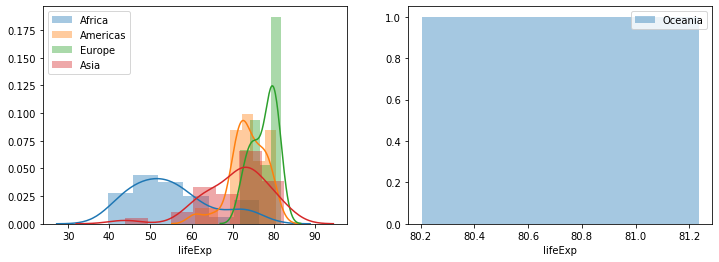

In [70]:
import warnings
warnings.filterwarnings("ignore")

file = '../Datasets/gdp_data.txt'
df = pd.read_csv(file)
print(df.head())

conti = set(df.continent) # set is unique - or you can use np.unique() to find out how many continents

plt.figure(figsize=(12,4))
for continent in conti:
    
    df_filtered = df.lifeExp[(df.year==2007)&(df.continent==continent)]    # filter year==2007 and continent
    
    if continent=='Oceania': # seperate oceanic data since there's only two points
        plt.subplot(1,2,2) 
        sns.distplot(df_filtered,label=continent,kde=False)
        plt.legend()
        print('The mode for lifeExp in',continent,'is',df_filtered.mode())
    else:                    # plot the rest
        plt.subplot(1,2,1) 
        sns.distplot(df_filtered,label=continent,kde=True)
        #print('The mode for lifeExp in',continent,'is',df_filtered.mode())

plt.legend()
plt.show()

### 3. Boxplots [optional]

- Download the data set "weekdata_000.xlsx" from Moodle
- take a look at the data frame using the .head() function
- use either the set() function or the .unique() function to count the number of "ReasonForCall", "AnsweringAgent" and "DaysOfWeek"
- Generate a box plot using the .boxplot() function of the **seaborn** module, with the horizontal axis showing "DayOfWeek" and the vertical axis showing "CallDuration"
- Now filter the data frame by the "AnsweringAgent" column using the **isin** keyword as follows: 

    - new_df = df[df['AnsweringAgent'].isin(['Cameron','Nicki','David','Kyle'])]   
    
- use the new_df data frame (which has only four names of the agents), to generate another boxplot showing the comparison of "CallDuration" among the above four agents.


In [80]:
file = '../Datasets/weekly_call_data/weekdata_000.xlsx'
df = pd.read_excel(file,index_col=0)
print(df.head())

reasons = set(df.ReasonForCall) 
#print(reasons)

for res in reasons:
    df1 = df[df.ReasonForCall==res]
    print('the # of calls for',res,'is',df1['ReasonForCall'].size)

  CallingNumber DayOfWeek TimeOfDay  CallDuration      ReasonForCall  \
0  774-823-8593       thu     10:30            20    Product Inquiry   
1  432-403-9821       fri     11:24            10          Complaint   
2  274-683-6814       tue     15:43            17  Technical Support   
3  681-402-6913       tue     13:44             2  Technical Support   
4  242-336-6459       wed     10:50            19  Technical Support   

  AnsweringAgent  
0        Cameron  
1        Cameron  
2        Kennedy  
3           Lisa  
4        Kennedy  
the # of calls for Product Inquiry is 342
the # of calls for Technical Support is 316
the # of calls for Complaint is 299
the # of calls for Return is 302


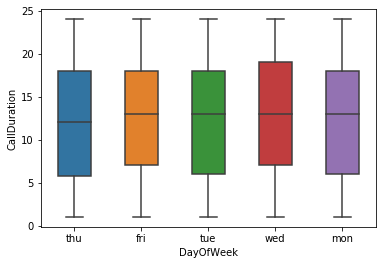

In [82]:
sns.boxplot(y='CallDuration',x='DayOfWeek',data = df, width=0.5) 
plt.show()

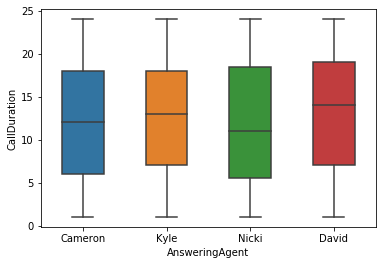

In [84]:
new_df = df[df['AnsweringAgent'].isin(['Cameron','Nicki','David','Kyle'])]
sns.boxplot(y='CallDuration',x='AnsweringAgent',data = new_df, width=0.5) 
plt.show()